# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')


# Display the data table for preview

merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [39]:
# Checking the number of mice.
mouse_count= merged_df["Mouse ID"].nunique()

print(mouse_count)

249


In [40]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

duplicates


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [41]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_rows = merged_df[duplicates]

duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
586,g989,Propriva,Female,21,26,0,45.000000,0
587,g989,Propriva,Female,21,26,0,45.000000,0
588,g989,Propriva,Female,21,26,5,48.786801,0
589,g989,Propriva,Female,21,26,5,47.570392,0
590,g989,Propriva,Female,21,26,10,51.745156,0
591,g989,Propriva,Female,21,26,10,49.880528,0
592,g989,Propriva,Female,21,26,15,51.325852,1
593,g989,Propriva,Female,21,26,15,53.442020,0
594,g989,Propriva,Female,21,26,20,55.326122,1
595,g989,Propriva,Female,21,26,20,54.657650,1


In [42]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

cleaned_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [43]:
# Checking the number of mice in the clean DataFrame.
mouse_count2= cleaned_df["Mouse ID"].nunique()

print(mouse_count2)

249


## Summary Statistics

In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_group_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_group_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_group_var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_group_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_group_sem = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


data = {
    "Mean Tumor Volume": regimen_group_mean,
    "Median Tumor Volume": regimen_group_median,
    "Tumor Volume Variance": regimen_group_var,
    "Tumor Volume Std. Dev.": regimen_group_std,
    "Tumor Volume Std. Err.": regimen_group_sem,
 
}

regimen_data = pd.DataFrame(data)

regimen_data

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Variance', 'var'),
    ('Standard Deviation', 'std'),
    ('SEM', lambda x: x.sem())
])

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

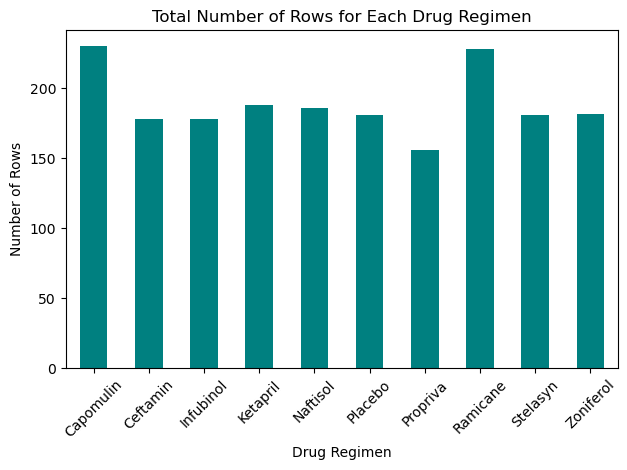

In [67]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


counts = cleaned_df.groupby('Drug Regimen').size()

# Create a bar plot
counts.plot(kind='bar', color='teal')

#titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')


# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to make sure labels fit
plt.show()

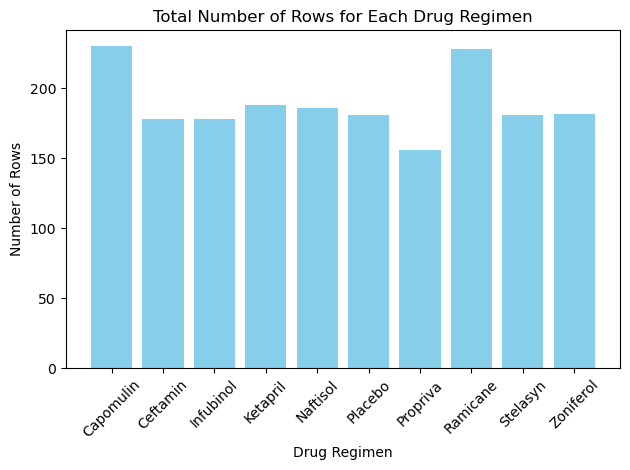

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


# Count the number of rows for each 'Drug Regimen'
counts = cleaned_df.groupby('Drug Regimen').size()

# Plotting with pyplot
fig, ax = plt.subplots()

# Create bar plot
ax.bar(counts.index, counts.values, color='skyblue')

# Add titles and labels
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows')

# Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()       # Adjust layout to make sure labels fit
plt.show()

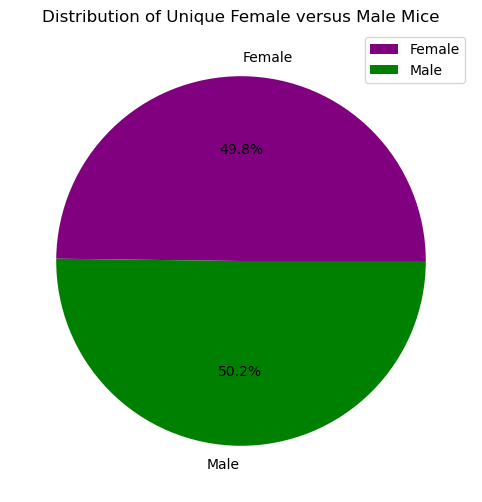

In [63]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


unique_counts = cleaned_df.drop_duplicates(subset='Mouse ID').groupby('Sex').size()

# Plot the pie chart
plt.figure(figsize=(8, 6))
unique_counts.plot(kind='pie', autopct='%1.1f%%', colors=['purple','green'], legend=True)

# Add title
plt.title('Distribution of Unique Female versus Male Mice')

# Show plot
plt.ylabel('')  # Hide the y-label for pie charts
plt.show()


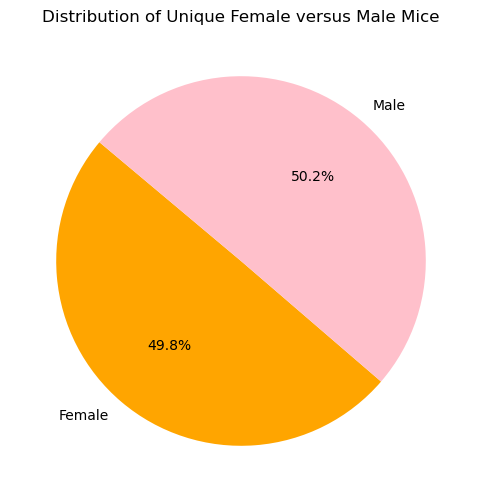

In [65]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


unique_counts = cleaned_df.drop_duplicates(subset='Mouse ID').groupby('Sex').size()

# Plot the pie chart using pyplot
plt.figure(figsize=(8, 6))
plt.pie(unique_counts, labels=unique_counts.index, autopct='%1.1f%%', colors=['orange','pink'], startangle=140)

# Add title
plt.title('Distribution of Unique Female versus Male Mice')

# Show plot
plt.show()


## Quartiles, Outliers and Boxplots

In [50]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoints

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoints_merge = pd.merge(last_timepoints, cleaned_df, on=['Mouse ID', 'Timepoint'])

last_timepoints_merge


treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = last_timepoints_merge[last_timepoints_merge['Drug Regimen'].isin(treatments)]


final_tumor_volumes



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
239,y769,45,Ceftamin,Female,6,27,68.594745,4
240,y793,45,Capomulin,Male,17,17,31.896238,2
241,y865,45,Ceftamin,Male,23,26,64.729837,3
245,z578,45,Ramicane,Male,11,16,30.638696,0


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatments:
    subset = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']


     # Adding subset to tumor_vol_data list
    tumor_vol_data.append(subset)
    
    # Calculating IQR for the subset
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Print outlier information for each treatment
    print(f'Treatment: {treatment}')
    print(f'  IQR: {IQR}')
    print(f'  Lower Bound: {lower_bound}')
    print(f'  Upper Bound: {upper_bound}')
    print(f'  Outliers: {outliers.tolist()}')
    print()





Treatment: Capomulin
  IQR: 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Outliers: []

Treatment: Ramicane
  IQR: 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Outliers: []

Treatment: Infubinol
  IQR: 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Outliers: [36.3213458]

Treatment: Ceftamin
  IQR: 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Outliers: []



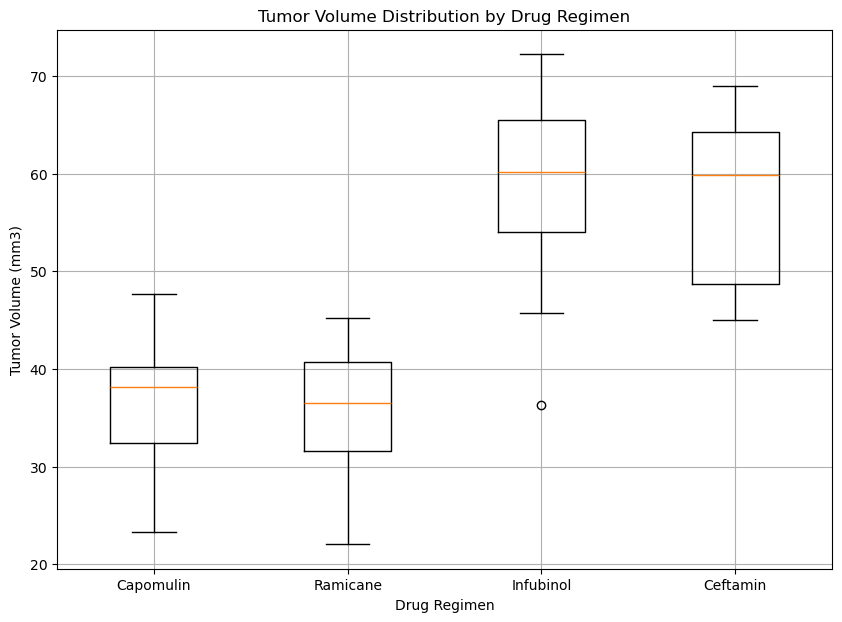

In [58]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 7))
plt.boxplot(tumor_vol_data, labels=treatments)

# Add titles and labels
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)


## Line and Scatter Plots

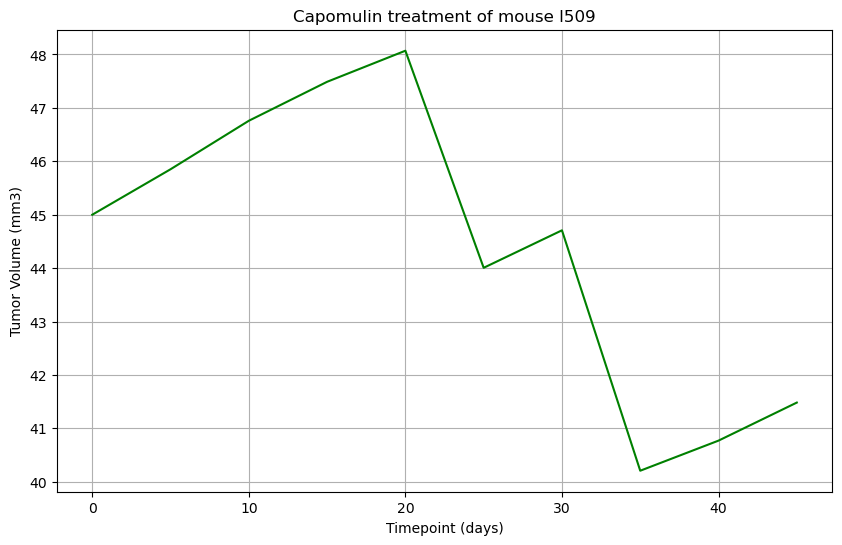

In [53]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Specify the treatment and mouse ID
treatment = 'Capomulin'
mouse_id = 'l509'  # Replace with an actual Mouse ID from your dataset

# Filter data for the specified treatment and mouse
mouse_data = cleaned_df[
    (cleaned_df['Drug Regimen'] == treatment) &
    (cleaned_df['Mouse ID'] == mouse_id)
]

mouse_data

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], linestyle='-', color='g')

# Add titles and labels
plt.title(f'{treatment} treatment of mouse {mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()

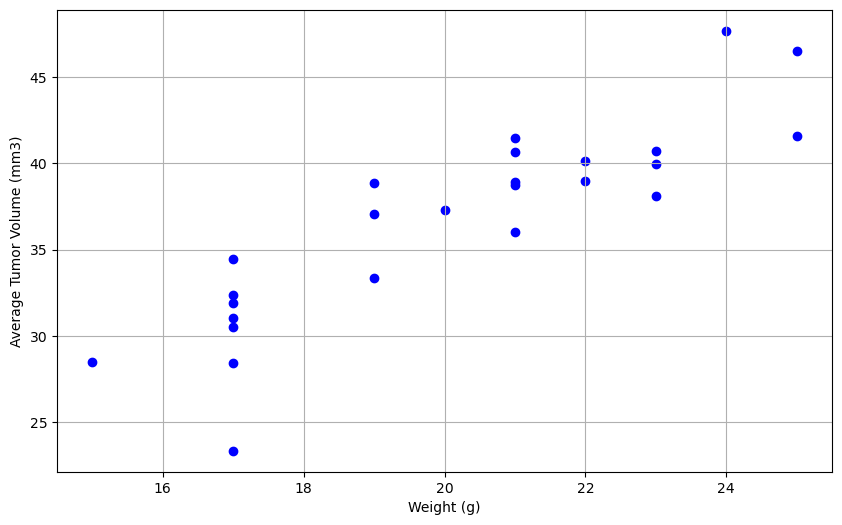

In [54]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
treatment = 'Capomulin'

mouse_data = final_tumor_volumes[
    (final_tumor_volumes['Drug Regimen'] == treatment)
]

plt.figure(figsize=(10, 6))
plt.scatter(mouse_data['Weight (g)'], mouse_data['Tumor Volume (mm3)'], color='b', marker='o')



plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

## Correlation and Regression

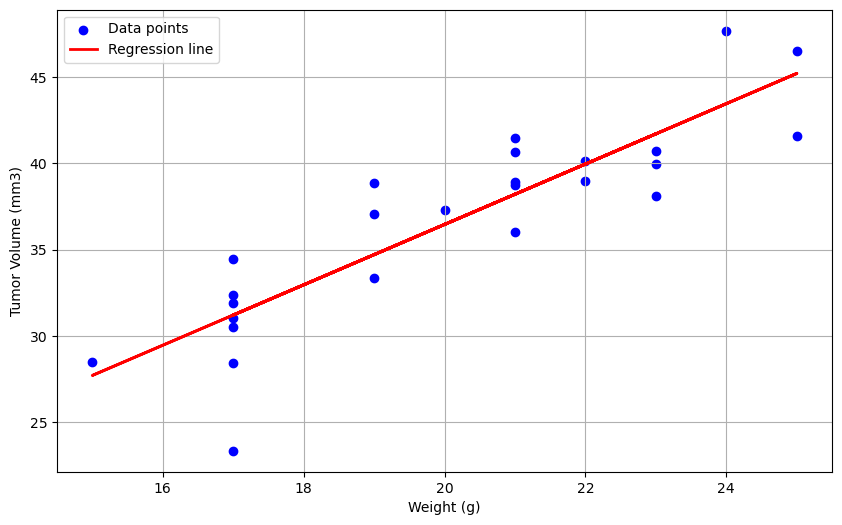

In [37]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

treatment = 'Capomulin'

mouse_data = final_tumor_volumes[
    (final_tumor_volumes['Drug Regimen'] == treatment)
]

# Prepare the data for linear regression
X = mouse_data['Weight (g)'].values  
y = mouse_data['Tumor Volume (mm3)'].values 

# means
X_mean = np.mean(X)
y_mean = np.mean(y)



numerator = np.sum((X - X_mean) * (y - y_mean))
denominator = np.sum((X - X_mean) ** 2)
slope = numerator / denominator
intercept = y_mean - (slope * X_mean)

# Create regression line
regression_line = slope * X + intercept

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='b', marker='o', label='Data points')

# Plotting the regression line
plt.plot(X, regression_line, color='r', linewidth=2, label='Regression line')

# Adding titles and labels
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()